# Making the Most of your Colab Subscription



In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install biopython
!apt install -y dssp  # DSSP needed for secondary structure extraction


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcifpp-data libcifpp2
The following NEW packages will be installed:
  dssp libcifpp-data libcifpp2
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,967 kB of archives.
After this operation, 15.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcifpp-data all 2.0.5-1build1 [437 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcifpp2 amd64 2.0.5-1build1 [1,019 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dssp amd64 4.0.4-1 [511 kB]
Fetched 1,967 kB in 1s (2,260 kB/s)
Preconfiguring packages ...
Selecting previously unselected package libcifpp-data.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .

In [18]:
!pip install scikit-learn pandas matplotlib imbalanced-learn tensorflow

In [90]:
import requests
import pandas as pd
import os
from tqdm import tqdm

# expanded list of bacteria (pathogens + non-pathogens)
expanded_species_taxids = {
    # VFDB pathogens
    "Escherichia_coli": "562",
    "Staphylococcus_aureus": "1280",
    "Pseudomonas_aeruginosa": "287",
    "Salmonella_enterica": "28901",
    "Listeria_monocytogenes": "1639",
    "Vibrio_cholerae": "666",
    "Mycobacterium_tuberculosis": "1773",
    "Shigella_flexneri": "623",
    "Klebsiella_pneumoniae": "573",
    "Yersinia_pestis": "632",
    "Helicobacter_pylori": "210",
    "Campylobacter_jejuni": "197",
    "Neisseria_meningitidis": "487",
    "Haemophilus_influenzae": "727",
    "Bordetella_pertussis": "520",
    "Francisella_tularensis": "263",
    "Legionella_pneumophila": "446",
    # Extra safe non-pathogens
    "Bacillus_subtilis": "224308",
    "Lactobacillus_rhamnosus": "47715",
    "Bifidobacterium_longum": "216816",
    "Streptococcus_thermophilus": "1308",
    "Corynebacterium_glutamicum": "1718",
    "Rhizobium_leguminosarum": "384",
    "Caulobacter_crescentus": "155892",
    "Synechocystis_sp_PCC6803": "1148",
    "Deinococcus_radiodurans": "1299"
}

# function to fetch non-virulent UniProt IDs
def fetch_non_virulent_uniprot_ids(taxid, max_results=2000):
    base_url = "https://rest.uniprot.org/uniprotkb/stream"
    query = f"(organism_id:{taxid}) AND (reviewed:true)"
    params = {
        "query": query,
        "format": "tsv",
        "fields": "accession",
        "size": max_results
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        lines = response.text.strip().split("\n")
        uniprot_ids = [line.strip() for line in lines[1:]]  # skip header
        return uniprot_ids
    else:
        print(f"❌ Failed fetching for taxid {taxid}")
        return []

# fetch and save
output_folder = "/content/drive/MyDrive/NonVirulent_Proteins_Expanded"
os.makedirs(output_folder, exist_ok=True)

all_non_virulent_ids = []

for organism, taxid in tqdm(expanded_species_taxids.items(), desc="Fetching Expanded Non-Virulent Proteins"):
    print(f"\nFetching non-virulent proteins for {organism}...")
    ids = fetch_non_virulent_uniprot_ids(taxid, max_results=2000)
    print(f"✅ Found {len(ids)} proteins for {organism}")

    pd.DataFrame(ids, columns=["UniProt_ID"]).to_csv(
        os.path.join(output_folder, f"non_virulent_{organism}.csv"), index=False
    )
    all_non_virulent_ids.extend(ids)

# save the combined list
pd.DataFrame(sorted(set(all_non_virulent_ids)), columns=["UniProt_ID"]).to_csv(
    os.path.join(output_folder, "non_virulent_all_expanded.csv"), index=False
)

print("\nTOTAL non-virulent proteins collected:", len(set(all_non_virulent_ids)))
print(f"Saved to {output_folder}")


Fetching Expanded Non-Virulent Proteins:   0%|          | 0/26 [00:00<?, ?it/s]


Fetching non-virulent proteins for Escherichia_coli...


Fetching Expanded Non-Virulent Proteins:   4%|▍         | 1/26 [00:00<00:09,  2.56it/s]

✅ Found 724 proteins for Escherichia_coli

Fetching non-virulent proteins for Staphylococcus_aureus...


Fetching Expanded Non-Virulent Proteins:   8%|▊         | 2/26 [00:00<00:09,  2.46it/s]

✅ Found 321 proteins for Staphylococcus_aureus

Fetching non-virulent proteins for Pseudomonas_aeruginosa...


Fetching Expanded Non-Virulent Proteins:  12%|█▏        | 3/26 [00:01<00:15,  1.51it/s]

✅ Found 93 proteins for Pseudomonas_aeruginosa

Fetching non-virulent proteins for Salmonella_enterica...


Fetching Expanded Non-Virulent Proteins:  15%|█▌        | 4/26 [00:02<00:17,  1.26it/s]

✅ Found 0 proteins for Salmonella_enterica

Fetching non-virulent proteins for Listeria_monocytogenes...


Fetching Expanded Non-Virulent Proteins:  19%|█▉        | 5/26 [00:03<00:17,  1.20it/s]

✅ Found 10 proteins for Listeria_monocytogenes

Fetching non-virulent proteins for Vibrio_cholerae...


Fetching Expanded Non-Virulent Proteins:  23%|██▎       | 6/26 [00:04<00:18,  1.10it/s]

✅ Found 13 proteins for Vibrio_cholerae

Fetching non-virulent proteins for Mycobacterium_tuberculosis...


Fetching Expanded Non-Virulent Proteins:  27%|██▋       | 7/26 [00:05<00:17,  1.08it/s]

✅ Found 4 proteins for Mycobacterium_tuberculosis

Fetching non-virulent proteins for Shigella_flexneri...


Fetching Expanded Non-Virulent Proteins:  31%|███       | 8/26 [00:07<00:20,  1.13s/it]

✅ Found 1696 proteins for Shigella_flexneri

Fetching non-virulent proteins for Klebsiella_pneumoniae...


Fetching Expanded Non-Virulent Proteins:  35%|███▍      | 9/26 [00:07<00:15,  1.08it/s]

✅ Found 231 proteins for Klebsiella_pneumoniae

Fetching non-virulent proteins for Yersinia_pestis...


Fetching Expanded Non-Virulent Proteins:  38%|███▊      | 10/26 [00:09<00:17,  1.07s/it]

✅ Found 1030 proteins for Yersinia_pestis

Fetching non-virulent proteins for Helicobacter_pylori...


Fetching Expanded Non-Virulent Proteins:  42%|████▏     | 11/26 [00:09<00:13,  1.08it/s]

✅ Found 21 proteins for Helicobacter_pylori

Fetching non-virulent proteins for Campylobacter_jejuni...


Fetching Expanded Non-Virulent Proteins:  46%|████▌     | 12/26 [00:10<00:13,  1.03it/s]

✅ Found 9 proteins for Campylobacter_jejuni

Fetching non-virulent proteins for Neisseria_meningitidis...


Fetching Expanded Non-Virulent Proteins:  50%|█████     | 13/26 [00:11<00:12,  1.03it/s]

✅ Found 14 proteins for Neisseria_meningitidis

Fetching non-virulent proteins for Haemophilus_influenzae...


Fetching Expanded Non-Virulent Proteins:  54%|█████▍    | 14/26 [00:12<00:11,  1.04it/s]

✅ Found 66 proteins for Haemophilus_influenzae

Fetching non-virulent proteins for Bordetella_pertussis...


Fetching Expanded Non-Virulent Proteins:  58%|█████▊    | 15/26 [00:13<00:10,  1.02it/s]

✅ Found 2 proteins for Bordetella_pertussis

Fetching non-virulent proteins for Francisella_tularensis...


Fetching Expanded Non-Virulent Proteins:  62%|██████▏   | 16/26 [00:14<00:09,  1.02it/s]

✅ Found 4 proteins for Francisella_tularensis

Fetching non-virulent proteins for Legionella_pneumophila...


Fetching Expanded Non-Virulent Proteins:  65%|██████▌   | 17/26 [00:15<00:08,  1.03it/s]

✅ Found 36 proteins for Legionella_pneumophila

Fetching non-virulent proteins for Bacillus_subtilis...


Fetching Expanded Non-Virulent Proteins:  73%|███████▎  | 19/26 [00:19<00:09,  1.31s/it]

✅ Found 4191 proteins for Bacillus_subtilis

Fetching non-virulent proteins for Lactobacillus_rhamnosus...
✅ Found 10 proteins for Lactobacillus_rhamnosus

Fetching non-virulent proteins for Bifidobacterium_longum...


Fetching Expanded Non-Virulent Proteins:  77%|███████▋  | 20/26 [00:19<00:05,  1.05it/s]

✅ Found 4 proteins for Bifidobacterium_longum

Fetching non-virulent proteins for Streptococcus_thermophilus...


Fetching Expanded Non-Virulent Proteins:  81%|████████  | 21/26 [00:20<00:04,  1.04it/s]

✅ Found 54 proteins for Streptococcus_thermophilus

Fetching non-virulent proteins for Corynebacterium_glutamicum...


Fetching Expanded Non-Virulent Proteins:  85%|████████▍ | 22/26 [00:21<00:03,  1.03it/s]

✅ Found 9 proteins for Corynebacterium_glutamicum

Fetching non-virulent proteins for Rhizobium_leguminosarum...


Fetching Expanded Non-Virulent Proteins:  88%|████████▊ | 23/26 [00:22<00:02,  1.01it/s]

✅ Found 31 proteins for Rhizobium_leguminosarum

Fetching non-virulent proteins for Caulobacter_crescentus...


Fetching Expanded Non-Virulent Proteins:  92%|█████████▏| 24/26 [00:23<00:01,  1.02it/s]

✅ Found 0 proteins for Caulobacter_crescentus

Fetching non-virulent proteins for Synechocystis_sp_PCC6803...


Fetching Expanded Non-Virulent Proteins:  96%|█████████▌| 25/26 [00:24<00:00,  1.02it/s]

✅ Found 0 proteins for Synechocystis_sp_PCC6803

Fetching non-virulent proteins for Deinococcus_radiodurans...


Fetching Expanded Non-Virulent Proteins: 100%|██████████| 26/26 [00:25<00:00,  1.01it/s]

✅ Found 1 proteins for Deinococcus_radiodurans

✅ TOTAL non-virulent proteins collected: 8574
✅ Saved to /content/drive/MyDrive/NonVirulent_Proteins_Expanded


In [91]:
import os
import pandas as pd
import requests
from tqdm import tqdm

# load your expanded UniProt IDs
expanded_ids_df = pd.read_csv("/content/drive/MyDrive/NonVirulent_Proteins_Expanded/non_virulent_all_expanded.csv")
uniprot_ids = expanded_ids_df["UniProt_ID"].dropna().tolist()

# prepare download folder
output_folder = "/content/drive/MyDrive/NonVirulent_AlphaFold_PDBs"
os.makedirs(output_folder, exist_ok=True)

# download function
def download_alphafold_pdb(uniprot_id, output_folder):
    url = f"https://alphafold.ebi.ac.uk/files/AF-{uniprot_id}-F1-model_v4.pdb"
    output_path = os.path.join(output_folder, f"{uniprot_id}.pdb")

    if os.path.exists(output_path):
        return "Already exists"

    response = requests.get(url)
    if response.status_code == 200:
        with open(output_path, "wb") as f:
            f.write(response.content)
        return "Downloaded"
    else:
        return "Not found"

# download all
results = []

for uniprot_id in tqdm(uniprot_ids, desc="Downloading AlphaFold PDBs"):
    status = download_alphafold_pdb(uniprot_id, output_folder)
    results.append({"UniProt_ID": uniprot_id, "Status": status})

# save the download summary
pd.DataFrame(results).to_csv(os.path.join(output_folder, "download_summary.csv"), index=False)

print("\n✅ Download complete. Summary saved!")



✅ Download complete. Summary saved!


In [94]:
import os
import pandas as pd
from Bio.PDB import PDBParser, DSSP
from tqdm import tqdm
import numpy as np

# Path to PDBs
pdb_folder = "/content/drive/MyDrive/NonVirulent_AlphaFold_PDBs"
output_csv = "/content/drive/MyDrive/NonVirulent_AlphaFold_PDBs/structure_features_extracted_clean.csv"

parser = PDBParser(QUIET=True)

def extract_features(pdb_path):
    features = {
        "UniProt_ID": os.path.basename(pdb_path).split(".")[0],
        "mean_pLDDT": np.nan,
        "alpha_helix_content": np.nan,
        "beta_sheet_content": np.nan,
        "coil_content": np.nan,
        "hbond_density": np.nan
    }

    try:
        structure = parser.get_structure("model", pdb_path)
        model = structure[0]

        # Mean pLDDT
        b_factors = [atom.get_bfactor() for atom in model.get_atoms()]
        if len(b_factors) > 0:
            features["mean_pLDDT"] = np.mean(b_factors)

        # DSSP
        try:
            dssp = DSSP(model, pdb_path)
            ss_counts = {"H":0, "B":0, "E":0, "G":0, "I":0, "T":0, "S":0, "-":0}
            hbonds = []

            for key in dssp.keys():
                ss = dssp[key][2]
                if ss in ss_counts:
                    ss_counts[ss] += 1
                hbonds.append(dssp[key][3])

            total = sum(ss_counts.values())
            if total > 0:
                helix_types = ss_counts["H"] + ss_counts["G"] + ss_counts["I"]
                sheet_types = ss_counts["E"] + ss_counts["B"]
                coil_types = ss_counts["T"] + ss_counts["S"] + ss_counts["-"]

                features["alpha_helix_content"] = helix_types / total
                features["beta_sheet_content"] = sheet_types / total
                features["coil_content"] = coil_types / total

            if len(hbonds) > 0:
                features["hbond_density"] = np.mean(hbonds)

        except Exception as dssp_error:
            # DSSP-specific failure
            pass

    except Exception as pdb_error:
        # Bad PDB structure
        pass

    return features

# Batch Extraction
all_features = []
pdb_files = [os.path.join(pdb_folder, f) for f in os.listdir(pdb_folder) if f.endswith(".pdb")]

for pdb_path in tqdm(pdb_files, desc="Extracting Features (Safe Mode)"):
    feats = extract_features(pdb_path)
    all_features.append(feats)

# Save features
features_df = pd.DataFrame(all_features)
features_df.to_csv(output_csv, index=False)

print(f"\nFeature extraction complete! Clean features saved to {output_csv}")


Extracting Features (Safe Mode): 100%|██████████| 8514/8514 [1:12:44<00:00,  1.95it/s]


✅ Feature extraction complete! Clean features saved to /content/drive/MyDrive/NonVirulent_AlphaFold_PDBs/structure_features_extracted_clean.csv


In [95]:
import pandas as pd

csv_path = "/content/drive/MyDrive/NonVirulent_AlphaFold_PDBs/structure_features_extracted_clean.csv"
df = pd.read_csv(csv_path)
df.head()


,UniProt_ID,mean_pLDDT,alpha_helix_content,beta_sheet_content,coil_content,hbond_density
0,A0A081HJP9,95.064723,NaN,NaN,NaN,NaN
1,A0A0A7HF73,93.826494,0.379167,0.341667,0.279167,0.301776
2,A0A0A7HF79,93.815284,0.290698,0.299419,0.409884,0.330532
3,A0A0A7HFE1,89.906073,0.536716,0.140187,0.323097,0.249902
4,A0A0A7HFE6,93.229352,0.586667,0.096000,0.317333,0.312187


Original shape: (8514, 6)
After dropping NaNs: (8505, 6)


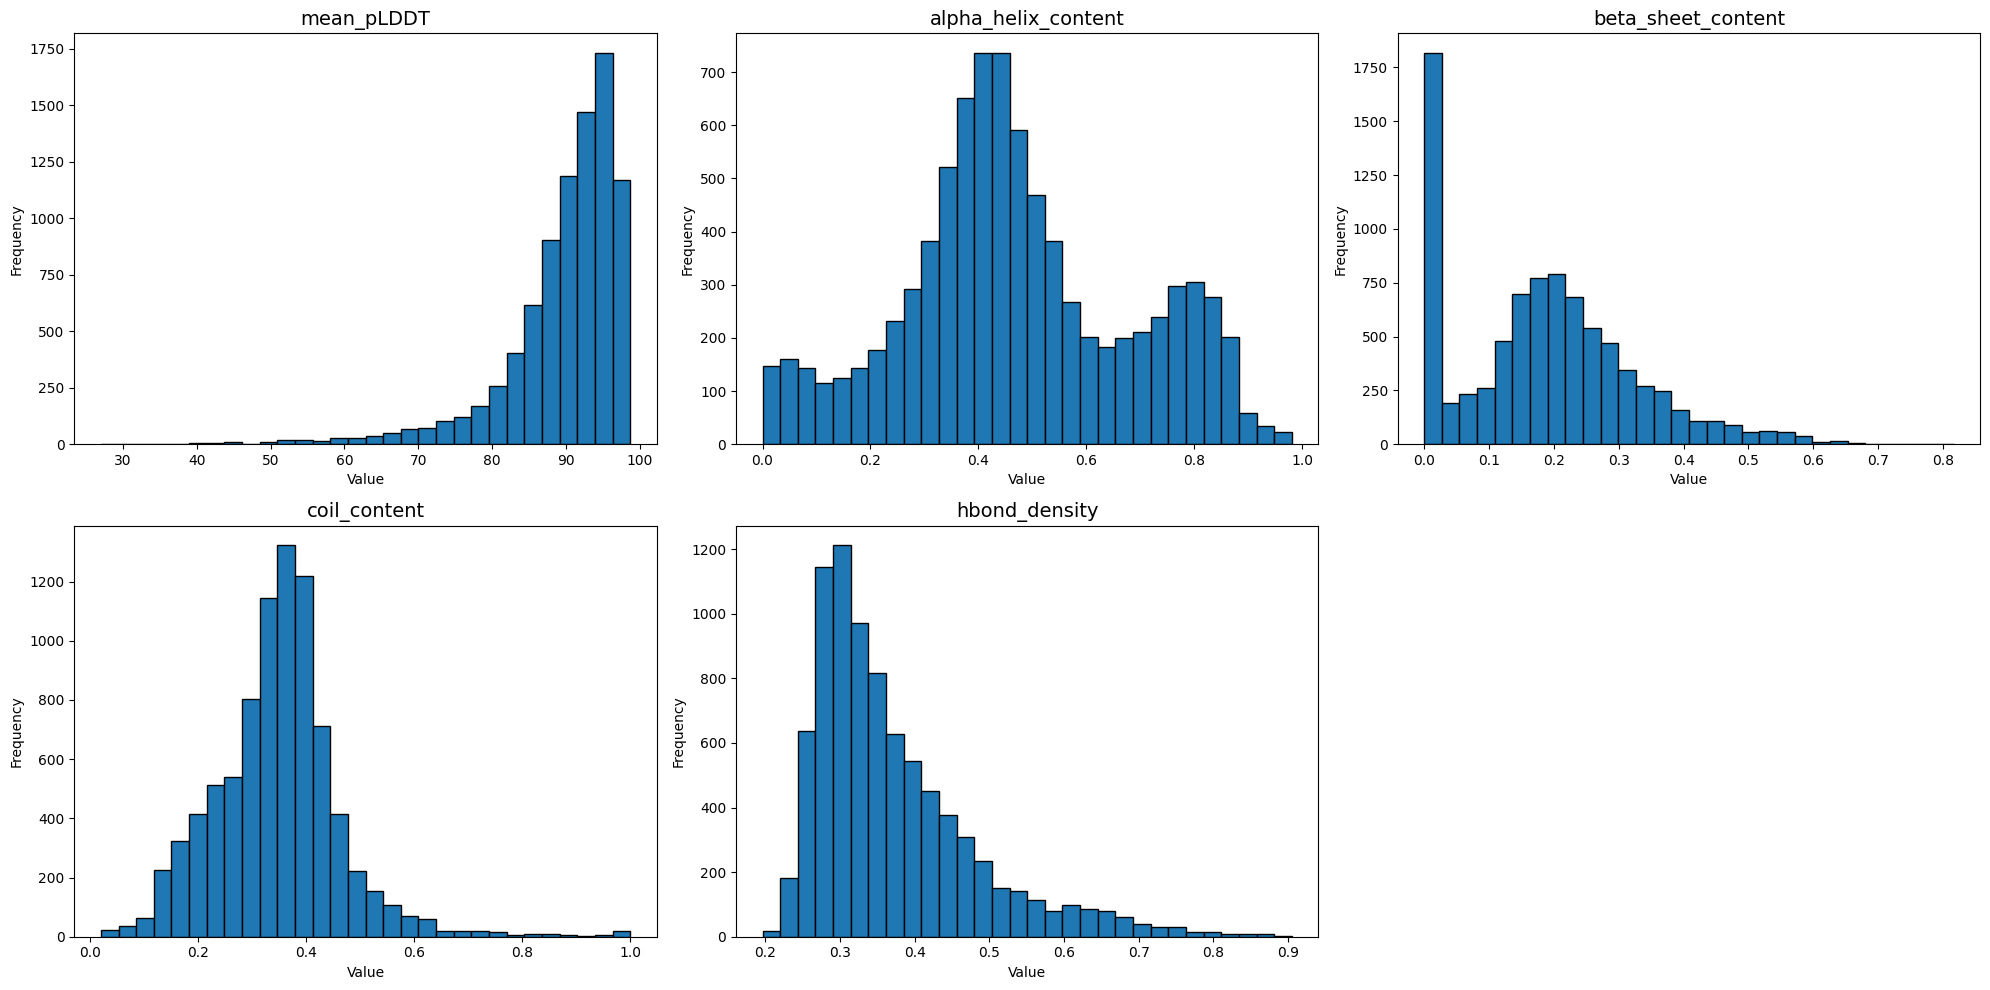

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# load the extracted features
csv_path = "/content/drive/MyDrive/NonVirulent_AlphaFold_PDBs/structure_features_extracted_clean.csv"
df = pd.read_csv(csv_path)

print(f"Original shape: {df.shape}")

# remove nan
df_clean = df.dropna()

print(f"After dropping NaNs: {df_clean.shape}")

#plot features
features_to_plot = ["mean_pLDDT", "alpha_helix_content", "beta_sheet_content", "coil_content", "hbond_density"]

plt.figure(figsize=(20, 10))

for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, idx)
    plt.hist(df_clean[feature], bins=30, edgecolor='black')
    plt.title(f'{feature}', fontsize=14)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [98]:
# Save the cleaned DataFrame
clean_csv_path = "/content/drive/MyDrive/NonVirulent_AlphaFold_PDBs/structure_features_extracted_clean_noNA.csv"
df_clean.to_csv(clean_csv_path, index=False)

print(f"✅ Cleaned CSV saved to {clean_csv_path}")

✅ Cleaned CSV saved to /content/drive/MyDrive/NonVirulent_AlphaFold_PDBs/structure_features_extracted_clean_noNA.csv
